Первый учебный проект курса "Аналитик данных буткемп" от Яндекс.Практикум.

Тема: Предобработка данных.

Работа с пропусками. Определение аномальных значений. Преобразование типов данных. Основные методы поиска дубликатов. Работа с несовершенными реальными наборами данных. Проект. Проверить гипотезу о влиянии email-рассылки на динамику повторных покупок.



# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
children_group_debt = data.pivot_table(index = [ 'children'], values = 'debt', aggfunc = {'count','sum'})
children_group_debt = children_group_debt.rename(columns={'count':'total','sum':'target'})
children_group_debt['debt_ratio%'] = round(children_group_debt['target']/children_group_debt['total'], 5).multiply(100)
children_group_debt = children_group_debt.sort_values(by='debt_ratio%', ascending=True)
children_group_debt

,total,target,debt_ratio%
children,,,
5,9,0,0.000
0,14091,1063,7.544
3,330,27,8.182
1,4808,444,9.235
2,2052,194,9.454
4,41,4,9.756


создала сводную таблицу в которой индексом выступила колонка "children", суммировано общее количество кредитов по группе "total", суммированы просрочки в колонке "target" и посчитана доля просрочек по группировке "ratio".

По таблице видно, что самая многочисленная категория заемщиков - не имеющие детей. 

Категория с пятью и четырьмя детьми невелика, на мой взгляд целесообразно сгруппировать заемщиков имеющих три, четыре и пять детей в одну группу.

In [23]:
def children_group(row):
    child = row['children']
    if child == 0:
        return 'Нет детей'
    if child == 1:
        return 'Один ребенок'
    if child == 2:
        return  'Два ребенка'
    if child >= 3:
        return 'Три и более детей'
    return 'Не определено'

создана функция, которая сгруппирует заемщиков по наличию и количеству детей.

In [24]:
data['having_children'] = data.apply(children_group, axis=1)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,having_children
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,Один ребенок
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,Один ребенок
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,Нет детей
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,Три и более детей
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,Нет детей
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью,Один ребенок
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем,Нет детей
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью,Один ребенок
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем,Три и более детей



добавила в датафрейм "data" столбец с результатами категоризации заемщиков по наличию и количеству детей - "having_children"


,total,target,debt_ratio%,children_ratio%
having_children,,,,
Нет детей,14091,1063,7.544%,66.059%
Три и более детей,380,31,8.158%,1.781%
Один ребенок,4808,444,9.235%,22.540%
Два ребенка,2052,194,9.454%,9.620%


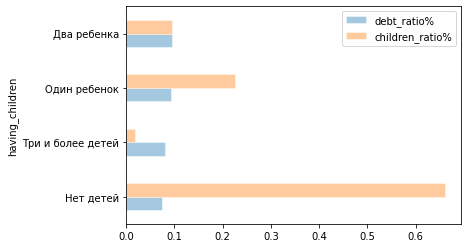

In [25]:
children_group_debt = data.pivot_table(index = [ 'having_children'], values = 'debt', aggfunc = {'count','sum'})
children_group_debt = children_group_debt.rename(columns={'count':'total','sum':'target'})
children_group_debt['debt_ratio%'] = round(children_group_debt['target']/children_group_debt['total'], 5)
children_group_debt = children_group_debt.sort_values(by='debt_ratio%', ascending=True)
children_group_debt['children_ratio%'] = round(children_group_debt['total'] / children_group_debt['total'].sum(), 5)
children_group_debt[['debt_ratio%', 'children_ratio%']].plot(kind="barh", ec="white", alpha=0.4, fontsize=10)
children_group_debt.style.format({'debt_ratio%': '{:.3%}', 'children_ratio%': '{:.3%}'}).background_gradient(cmap='Greens',subset='debt_ratio%')



создала сводную таблицу в которой показана категория заемщиков по наличию детей и их количеству, общим количеством кредитов по группе "total", невозвратом "target", процентом просрочек по группировке "ratio%", процентом заемщиков по категории количества детей "children_ratio%"


**Вывод:**  
    66 % заемщиков не имеет детей, у 23 % заемщиков есть один ребенок, еще 10 % заемщиков имеет двух детей. Менее 2 % заемщиков имеет три ребенка и более. 
   Разница в просрочке по выплатам кредита между группой заемщиков, имеющих  одного или двух детей - незначительна и составляет  0,22%. 
   Размер выборок категории заемщиков имеющих 3 ребенка и более невелик, процент просрочек по кредиту не выбивается из общей картины, но так как выборка невелика, то выводы по ней строить не следует.
   
   Исходя из полученных данных, группа заемщиков "Нет детей"- имеет самую низкую долю просрочек по кредиту 7,54%, по сравнению с любой из групп имеющих детей. Однако разница в просрочках по кредиту между категориями не имеющих детей и имеющих одного или двух детей, составляет менее 2%. 
    Рассматривать количества детей как прямой фактор по возвратности кредита нецелесообразно. Необходимо смотреть совокупно с другими факторами.
   

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,total,target,debt_ratio%,status_ratio%
family_status,,,,
вдовец / вдова,951,63,6.625%,4.458%
в разводе,1189,84,7.065%,5.574%
женат / замужем,12261,927,7.561%,57.480%
гражданский брак,4134,385,9.313%,19.380%
Не женат / не замужем,2796,273,9.764%,13.108%


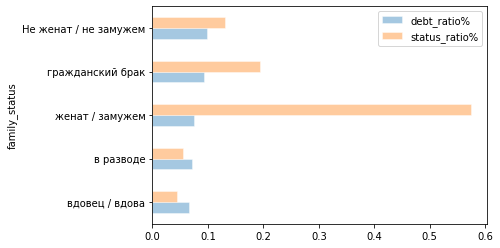

In [26]:
family_status_debt = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = {'count','sum'})
family_status_debt = family_status_debt.rename(columns={'count':'total','sum':'target'})
family_status_debt['debt_ratio%'] = round(family_status_debt['target']/family_status_debt['total'], 5) 
family_status_debt['status_ratio%'] = round(family_status_debt['total'] / family_status_debt['total'].sum(), 5)
family_status_debt = family_status_debt.sort_values(by='debt_ratio%', ascending=True)
family_status_debt[['debt_ratio%', 'status_ratio%']].plot(kind="barh", ec="white", alpha=0.4, fontsize=10)
family_status_debt.style.format({'debt_ratio%': '{:.3%}', 'status_ratio%': '{:.3%}'}).background_gradient(cmap='Greens',subset='debt_ratio%')

создала сводную таблицу "family_status_debt" в которой индексом выступила колонка "family_status", суммировано общее количество кредитов по группе "total", суммированы просрочки в колонке "target" и посчитан % просрочек по группировке "debt_ratio%", добавлена колонка с семейным статусом заемщика в % от общего числа заемщика 'status_ratio%'.


**Вывод:**
Зависимость между семейным положением и возвратом кредита в срок прослеживается.

Большая доля невозвратов 9,76% приходится на категорию не состоящих в браке, они занимают пятое, последнее место в рейтинге благонадежности заемщика, причем % невозвратов у сожительствующих людей сопоставима с не состоящими в браке - 9,31%, они занимают четвертое место. 

Предполагаемые причины такой доли просрочек по кредиту: молодой возраст, незрелое чувство ответственности, нестабильное финансовое положение, неумение вести семейный бюджет и распределять личные средства.

Наименьшее число невозвратов в групп со статусом вдовец/вдова и в разводе 6,62%. 

С одной стороны - это одинокие люди как и не женатые/не замужние, с другой стороны доля невозвратов у этих групп наименьшая, а у тех, кто не состоял в браке - наибольшая.

Можно предположить, что фактором различия между  группами никогда не соостоящих в браке и ранее состоящих в браке, является возраст. Состоявшие ранее в браке, с большей долей вероятности старше по возрасту в общей массе, чем ранее не состоявшие, что в свою очередь добавляет вероятность наличия большего опыта работы у первых и, как следствие - наличия стабильного заработка. Что совокупно уменьшает долю невозвратности в группе ранее состоявших в браке.

Группа состоящих в настоящее время в браке на третьем месте по количеству просрочек кредитов -7,56%, это косвенно вписывется в вышеизложенную гипотезу про возраст. Вероятно люди, состоящие в официальном браке в среднем старше, чем не состоящие, соответственно доля невозвратов уменьшена. Чтобы подтвердить или опровергнуть эту гипотезу необходимо смотреть средний возраст состоящих в браке, не состоящих и ранее состоящий в браке.

Если не рассматривать заемщиков в разрезе возраста и других факторов, а только лишь по семейному положению, то люди никогда не состоявшиев официальном браке, а сюда входит группа "гражданский брак" и "Не женат / не замужем" - категория заемщиков имеющая большую долю просрочек по кредитам. Что видно на представленном графике.


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total,target,debt_ratio%,income_ratio%
total_income_category,,,,
C,15921,1353,8.498%,74.638%
B,5014,354,7.060%,23.506%
D,349,21,6.017%,1.636%
A,25,2,8.000%,0.117%
E,22,2,9.091%,0.103%


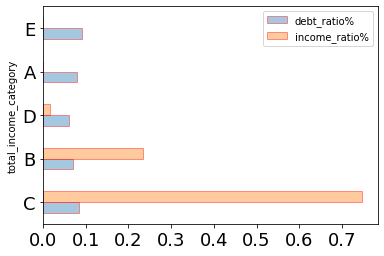

In [27]:
income_debt = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc = {'count','sum'})
income_debt = income_debt.rename(columns={'count':'total','sum':'target'})
income_debt['debt_ratio%'] = round(income_debt['target']/income_debt['total'], 6)
income_debt['income_ratio%'] = round(income_debt['total'] / income_debt['total'].sum(), 6)
income_debt = income_debt.sort_values(by='income_ratio%', ascending=False)
income_debt[['debt_ratio%', 'income_ratio%']].plot(kind="barh", ec="red", alpha=0.4, fontsize=18)
income_debt.style.format({'debt_ratio%': '{:.3%}', 'income_ratio%': '{:.3%}'}).background_gradient(cmap='Greens',subset='debt_ratio%')


'total_income_category'содержит информацию об уровне дохода, разбитому по категориями:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

Создала сводную таблицу с данными из колонки 'total_income_category', также суммировано общее количество кредитов по группе "total", суммированы просрочки в колонке "target" и посчитан % просрочек по группировке "ratio%", добавлена колонка % соотношение заемщиков по категории дохода, отсортировала по этой колонке.

добавлен график с горизонтальными полосами для каждой категории заемщиков с % от общего числа заемщиков и % по наличию просрочек по кредиту.

**Вывод:** 
Исходя из данных анализа, зависимость между уровнем дохода и возвратом кредита в срок прослеживается. Самый благонадежный заемщик имеет уровень дохода от 200 001 до 1 000 000, относится к категории "В".

Заемщики сгруппированы на 5 категорий по размеру ежемесячных доходов. 

Самая многочисленная категория заемщиков "С" - 74,64% - это люди с доходом от 50 000 до 200 000.

Второе место у заемщиков категории "В" - 23,51% с ежемесячным доходом 200 001 - 1 000 000.

Из графика по группе заемщиков "С" и "В" видно, что у самой многочисленной группы С уровень наличия просрочки по кредиту выше, чем у группы "В". Однако видно по графику, что средний уровень наличия просрочек по кредиту всеже не сильно выбивается из общей массы.

Если сравнивнить две самые многочисленные группы заемщиков "С" и "В", то наличие просрочек по кредитам составляет:
у группы "С"  8,5%;
у группы "В"  7,1%.

Можно предположить, что более высокий уровень дохода у заемщиков, а именно в диапазоне от  200 001 до 1 000 000 делает этих людей более платежеспособными,чем группу с доходами от 50 001 до 200 000. Возможно стоит сгруппировать заемщиков по доходам исходя из других критериев, чтобы сравнить результаты.

Три группы заемщиков делят 3,4, и 5 места в рейтинге по самому высокому % среди заемщиков по уровню дохода.

Это заемщики с доходами по группам "D", "A", "E". 
Они имеют самый низкий процент среди всех заемщиков 1,64%, 0,12% и 0,10% соответственно и выбиваются из общего числа заемщиков. Заемщиков у которых доход до 30 000 - 0,10% среди всех заемщиков. Можнол предположить с большей долей вероятности,что уровень дохода у этих заемщиков на выплату кредита недостаточен. 

Категория заемщиков с доходом  свыше 1 000 000 составляет 0,12%. 

Такой уровень дохода не является средним и распространенным, поэтому такой низкий% вполне обоснован и не выглядит аномально. Заемщиков категории "D" с доходом в диапазоне от 30 001 до 50000 уже больше - 1,61%, но по все еще низок.Вероятно такой уровнь дохода все еще недостаточен для погашения кредита и % по нему.

Выводы по категориям заемщиков "D", "A", "E" делать не целесобразно из-за слишком маленькой выборки.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,total,target,debt_ratio%,purpose_ratio%
purpose_category,,,,
операции с недвижимостью,10751,780,7.255%,50.401%
операции с автомобилем,4279,400,9.348%,20.060%
получение образования,3988,369,9.253%,18.696%
проведение свадьбы,2313,183,7.912%,10.843%


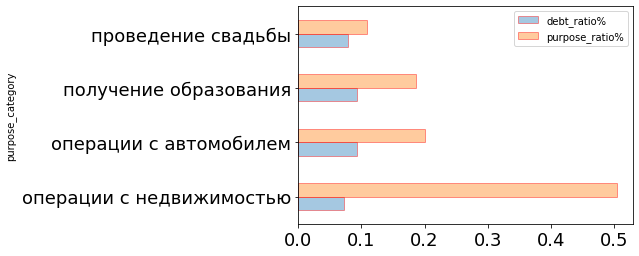

In [28]:
purpose_debt = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc = {'count', 'sum'})
purpose_debt = purpose_debt.rename(columns={'count': 'total', 'sum': 'target'})
purpose_debt['debt_ratio%'] = round(purpose_debt['target']/purpose_debt['total'], 6)
purpose_debt['purpose_ratio%'] = round((purpose_debt['total'] / purpose_debt['total'].sum()), 6)
purpose_debt = purpose_debt.sort_values(by='total', ascending=False)
purpose_debt[['debt_ratio%', 'purpose_ratio%']].plot(kind="barh", ec="red", alpha=0.4, fontsize=18)
purpose_debt.style.format({'debt_ratio%': '{:.3%}', 'purpose_ratio%': '{:.3%}'}).background_gradient(cmap='Greens',subset='debt_ratio%')


в таблице "data" в колонке "purpose_category" цели кредита сгруппированы на следующие категории:
 - 'операции с автомобилем',
 - 'операции с недвижимостью',
 - 'проведение свадьбы',
 - 'получение образования'.

создала сводную таблицу "ppurpose_debt" в которой индексом выступила колонка "purpose_category", 

суммировано общее количество кредитов по группе "total", 

суммированы просрочки в колонке "target" и 

посчитан % просрочек по группировке "ratio%", 
добавлена колонка "purpose_ratio%" с величиной % отношения по цели кредита от общих взятых кредитов.

добавлена таблица с выводом отношений % от цели кредита

**Вывод:** 

Операции с недвижимостью имеют наименьший вес невозврата кредита в срок. 

Предположительные причины, которые повлияли на это: более ответственное отношение к кредиту как со стороны банка, так и со стороны заемщика. А значит вероятность получения кредита на эмоциях ниже, так как операции с недвижимостью требуют большего времени и подготовки.

На получение образования и операции с автомобилем приходится почти одинаковая доля получения кредита. 

При этом эти две группы имеют  наибольший удельный вес среди имеющих просрочку по кредиту. Причины просрочек у этих групп могут быть разными. У тех, кто берет кредит на образование риск невозврата вероятно связан с низким доходом или его отсутствием, простоты получения кредита, ввиду несущественной суммы, по сравнению со стоимостью недвижимости.

У тех кто берет кредит на автомобиль вероятными причинами могут быть низкий уровень дохода, необходимостью дополнительных затрат на автомобиль, эмоциональная покупка без должной осмотрительности заемщика и оцениванию сил на погашения кредита.

Кредит на проведение свадьбы занимает второе место как по цели получения, так и по удельному весу наличия просрочек по кредиту.


<div class="alert-success"> 
<b>Комментарий ревьюера </b>

Здорово, что добавлена визуализация, но:
1. Не забывай подписывать графики, это важно (по всем осям)
2. Абсолютные значения в данном случае не информативны, не несут особо никакой полезной информации, а они есть у тебя на графике
3. За счет того, что ты добавила абсолютные значения, относительные (проценты) толком не различимы. Не разобрать, какая между ними разница, смотря только на график, что плохо
        
Привожу оптимальный код ниже:

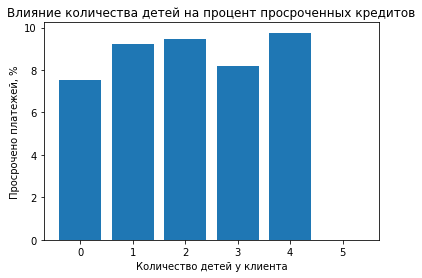

In [29]:
# Код ревьюера

import matplotlib.pyplot as plt

# группируем данные по количеству детей ('children'), затем применяем агрегирующие функции к столбцу 'debt'
grouped_data = data.groupby('children')['debt'].agg(['count', 'mean', 'sum'])
# функция reset_index используется для преобразования индекса в столбец данных
grouped_data.reset_index(inplace=True)
# используем график к таблице, выбираем интересующие нас столбцы (проценты по одной оси и кол-во детей по другой)
plt.bar(grouped_data['children'], grouped_data['mean']*100) # умножаем на 100, чтобы перевести в проценты
# подписываем
plt.title("Влияние количества детей на процент просроченных кредитов")
plt.xlabel("Количество детей у клиента")
plt.ylabel("Просрочено платежей, %")
plt.xticks(grouped_data['children'])
plt.show()

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*

Наличие пропусков было обнаружено в столбцах days_employed и total_income. 

Причины пропусков в данных всегда или технологические, или вызванные человеческим фактором.

Возможные технологические причины: сбой при записи, смена формата, ошибки при считывании. Человеческий фактор будет всегда присутствовать там, где значение вводит человек, это например: некорректный ввод данных, сокрытие информации, непонимание как внести информацию (неграмотность), мошенничество(фрод).

Стоит обратить внимание на то, что количество пропусков в столбцах одинаковы. Это может быть как совпадением, так и показывать взаимосвязь заполнения одного из столбцов, если данные в другом столбце не проставлены, что косвенно может указывать на технологические причины потери части данных. 

Если устранить такую технологическую причину, то, предположительно, потеря данных сократится. 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Лучшее решение для количественных переменных - заполнить пропуски медианным значением, а не средним арифметическим, так как медиана является более устойчивым показателем к выбросам в данных.

### Шаг 4: общий вывод.

In [30]:
display(children_group_debt.style.highlight_max(color='lightblue'))
display(family_status_debt.style.highlight_max(color='lightgreen'))
display(purpose_debt.style.highlight_max(color='yellow'))
income_debt.style.highlight_max(color='lightpink')

,total,target,debt_ratio%,children_ratio%
having_children,,,,
Нет детей,14091,1063,0.075440,0.660590
Три и более детей,380,31,0.081580,0.017810
Один ребенок,4808,444,0.092350,0.225400
Два ребенка,2052,194,0.094540,0.096200


,total,target,debt_ratio%,status_ratio%
family_status,,,,
вдовец / вдова,951,63,0.066250,0.044580
в разводе,1189,84,0.070650,0.055740
женат / замужем,12261,927,0.075610,0.574800
гражданский брак,4134,385,0.093130,0.193800
Не женат / не замужем,2796,273,0.097640,0.131080


,total,target,debt_ratio%,purpose_ratio%
purpose_category,,,,
операции с недвижимостью,10751,780,0.072551,0.504008
операции с автомобилем,4279,400,0.093480,0.200600
получение образования,3988,369,0.092528,0.186958
проведение свадьбы,2313,183,0.079118,0.108434


,total,target,debt_ratio%,income_ratio%
total_income_category,,,,
C,15921,1353,0.084982,0.746379
B,5014,354,0.070602,0.235057
D,349,21,0.060172,0.016361
A,25,2,0.080000,0.001172
E,22,2,0.090909,0.001031


**Общий вывод**

Исследованы данные от банка: статистика о платежеспособности клиентов. 

Цель исследования - получить информацию, которая сможет быть учтена при построении модели кредитного скоринга.

На стадии  предобработки данных были обнаружены пропущенные значения в столбцах days_employed и total_income.

Пропуски в данных вызваны технологическими человеческим факторами.
Возможные технологические причины: сбой при записи, смена формата, ошибки при считывании. Человеческий фактор будет всегда присутствовать там, где значение вводит человек, это например: некорректный сбор и/или ввод данных в анкету заемщика со стороны работника банка; сокрытие информации заемщиком, мошенничество (фрод).


Стоит обратить внимание на то, что количество пропусков в столбцах одинаково для этих двух показателей: days_employed и total_income.


Это может быть как совпадением, так и показывать взаимосвязь между заполнением данных в этих столбцах. Например, отсутствие заполнения одного из столбцов обнуляет заполнение данных в другом столбце, что косвенно может указывать на технологические причины потери части данных.
Если устранить такую технологическую причину, то потеря данных сократится.


Банком  заемщики были отнесены к категориям по семейному положение и наличию детей и была собрана информация о цели получения кредита, уровне дохода заемщика.


В представленных данных встречались  отрицательные значения в количестве дней трудового стажа. 
В ходе работы была проведена предобработка данных - устранены пропуски, некорректные значения, неявные дубликаты. 


В дальнейшем при сборе данных, есть смысл на стадии сбора данных унифицировать получаемые значения по цели получения кредита, наладить сбор данных о стаже работы заемщика.


В ходе работы, заемщиков разделили на когорты в зависимости от величины дохода:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.


Была произведена группировка  целей получения кредита  на четыре категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Были проанализированы зависимости между данными о заемщике и возвратом кредита в срок - каждая зависимость была проанализирована отдельно.

Явных лидеров среди критериев заемщиков, явно показывающих влияние напрямую на погашение кредита в срок не обнаружено.

Чаще всего возвращают в срок кредиты на операции с недвижимостью 7,26% и на проведение свадьбы 7,91%. Операции с недвижимостью являются целью получения кредита в 50,40 % случаев, в то время как на свадьбу привлекают заемные средства в  10,84% случаев.

Кредит на автомобиль берут  20,06% заемщиков. Кредит на образование тоже популярен и составляет 18,69%,  при этом больше всего задержек по выплате кредита именно по этим двум категориям целей: на операции с автомобилями 9,34% и на получение образования  9,25%.

Заемщики с одним или двумя детьми - чаще всех допускают просрочку по кредиту 9,24% и 9,45%, их общая доля среди всех заемщиков велика 32,16%. Заемщики без детей наоборот -имеют самый низкий процент невозвратов 7,54%, они же составляю 68,06% всех заемщиков.

Семейное положение клиентов банка дало небольшую корреляцию по наличию просроченных платежей:
- вдовец/вдова и состоящие в разводе имеют самый низкий процент 6,63% и 7,07% соответственно.
При этом доля таких заемщиков не очень высока и составляет 4,46% и 5,57% от общего числа заемщиков соответственно.


- самыми многочисленными заемщиками являются женатые - 57,48% от общего числа заемщиков. При этом доля невозвратов по такой группе составляет 7,56% - это близко к группе вдовцов и разведенных.
- не женатые и состоящие в гражданском браке показывают более высокий уровень просрочек по кредиту - 9,76%  и 9,31%, что сопоставимо друг с другом, при этом  их общая доля в общем числе заемщиков достаточно велика - 32,48% (19,38% гражданский брак и 13,10 % не женатые).

Возьмем за основу данные, полученные в ходе проведенного анализа и оставим портрет самого неблагонадежного заемщика с самым высоким процентом невозвратов кредита в срок. 

Используем значения из таблиц по колонке "debt_ratio%", в которой отражен уровень просрочки среди всех заемщиков в процентах. Для некоторых категорий будут взяты два аргумента одного параметра с наибольшими показателями по величине просрочки. Соответственно первый параметр - с наибольшим процентом просроченных обязательств, второй аргумент соответственно второй по величине просрочки. Аналогично составим портрет самого дисциплинированного заемщика. 

Портрет заемщика с наибольшим риском невозврата:
имеет двух детей/ имеет одного ребенка
семейный статус "не женат/не замужем" / “гражданский брак” ;
цель кредита “на операции с автомобилем”/ ”получение образования”;
уровень дохода “С” - 50001–200000

Портрет заемщика с наименьшим риском невозврата:
нет детей;
семейный статус “вдовец/вдова” /“в разводе” /"женат/замужем"; 
цель кредита “на операции с недвижимостью”/ ”проведение свадьбы”;
уровень дохода “В” - 200001–1000000


Вывод исследования:  На факт погашения кредита в срок положительно сказывается отсутствие детей у заемщика и статус семейного положения “вдовец/вдова” /“в разводе” /"женат/замужем". При этом самыми многочисленной группой заемщиков  из перечисленных является не имеющая детей и находящаяся в зарегистрированном браке. Это значит, что женатые бездетные пары -являются как самой многочисленной группой заемщиков среди тех, кто возвращает кредиты в срок.


**Комментарий ревьюера**
По визуализации могу посоветовать следующие материалы: 
    
    1. https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem02-charts.ipynb 
    
    2. https://github.com/Palladain/Deep_Python/blob/main/Lectures/Lecture_3/Lecture_3_Python.ipynb    

    